<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [29]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [30]:
df[:5]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


1. Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

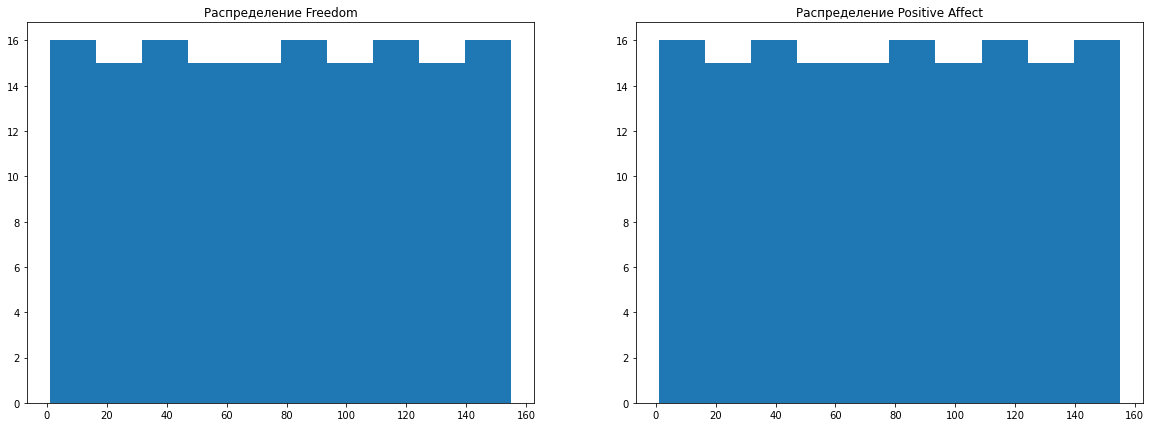

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
axes[0].hist(df['Freedom'])
axes[0].set_title('Распределение Freedom')


axes[1].hist(df['Positive affect'])
axes[1].set_title('Распределение Positive Affect')

plt.show()

Это равномерное распределение

2. Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

Медиана:

In [32]:
freedom = df['Freedom']
median = np.median(freedom.dropna())
median

78.0

Мат. ожидание:

In [33]:
mean = np.mean(freedom.dropna())
mean

78.0

Стандартное отклонение:

In [34]:
std = freedom.dropna().std()
std

44.88875137492688

Дисперсия:

In [35]:
var = std**2
var

2015.0000000000002

Минимум:

In [36]:
min_ = min(freedom.dropna())
min_

1.0

Максимум:

In [37]:
max_ = max(freedom.dropna())
max_

155.0

Размах:

In [38]:
diff = max_ - min_
diff

154.0

Выбросы:

In [39]:
df[freedom.isna()]

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
28,Qatar,29,86,NaN,NaN,NaN,NaN,NaN,NaN,1.0,43.0


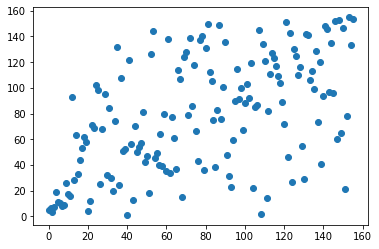

In [40]:
plt.scatter(freedom.index, freedom)
plt.show()

Отсутствуют аномальные значения, поэтому выбросы здесь - это только пропущенные значения

Почему нельзя найти моду? Так как каждое значение в столбце встречается только один раз

3. Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

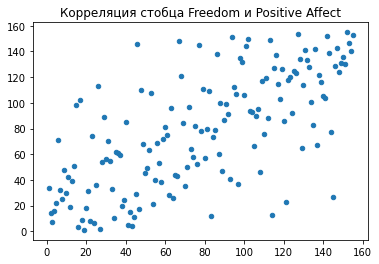

In [41]:
positive_affect = df['Positive affect']
plt.scatter(x=positive_affect, y=freedom, s=20)
plt.title('Корреляция стобца Freedom и Positive Affect')
plt.show()

In [42]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(positive_affect.dropna(),
                         freedom.dropna())
print(corr)

0.6817698430601657


Число 0.6817698430601657 больше нуля, соответственно число с положительным знаком, значит корреляция прямая

4. Нормализовать данные колонки Freedom (централизация + масштабирование)

In [43]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
freedom_2 = min_max_scaler.fit_transform(freedom.values.reshape(-1, 1))

print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


5. Построить матрицу корреляций для всех колонок таблицы

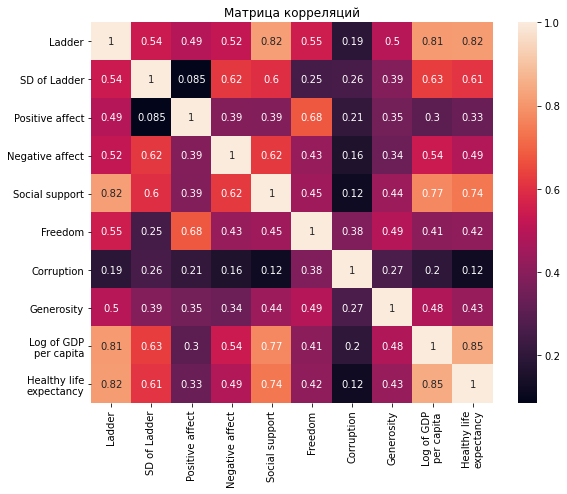

In [44]:
import seaborn as sns
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(), annot=True)
plt.title('Матрица корреляций')
plt.show()

6. Загрузить таблицу цен на авокадо: 

In [20]:
df=pd.read_csv('avocado.csv', index_col='Unnamed: 0')
df[:3]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


7. Сделать частотный график колонки AveragePrice. Какое это распределение?

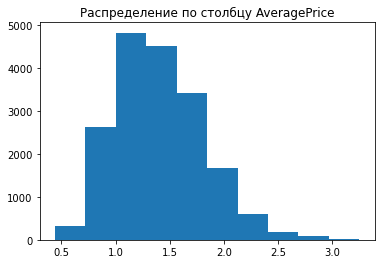

In [21]:
plt.hist(df['AveragePrice'])
plt.title('Распределение по столбцу AveragePrice')

plt.show()

Это нормальное распределение 

8. Найти корреляцию в следующих колонках: колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

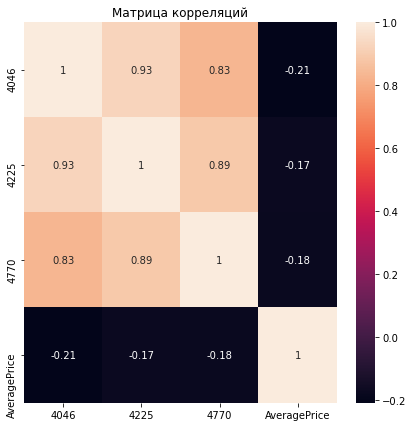

In [22]:
df_smaller = df[['4046', '4225', '4770', 'AveragePrice']]

plt.figure(figsize=(7, 7))
sns.heatmap(df_smaller.corr(), annot=True)
plt.title('Матрица корреляций')
plt.show()

AveragePrice имеет обратную корреляцию со всеми остальными столбцами, значит его значения меняются в противоположную сторону от значений столбцов 4046, 4225, 4770. 

Но между собой у этих столбцов прямая корреляция, то есть они будут меняться вместе друг с другом в одну и ту же сторону.